In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

data=pd.read_csv("projdataupdated.txt",sep="\t")
data.head()

,Temperature (°C),Wind speed (m/s),Q-NH3
0,13.96,0.894444,0.026201
1,13.86,0.708333,0.031424
2,14.18,0.494444,0.092088
3,14.17,1.397222,0.099792
4,13.88,1.480556,0.133020


In [18]:
emean=data["Q-NH3"].mean()
emedian=data["Q-NH3"].median()
estd=data["Q-NH3"].std()

tmean=data["Temperature (°C)"].mean()
tmedian=data["Temperature (°C)"].median()
tstd=data["Temperature (°C)"].std()

wmean=data["Wind speed (m/s)"].mean()
wmedian=data["Wind speed (m/s)"].median()
wstd=data["Wind speed (m/s)"].std()

print(f"Ammonia Emission Rate:\nMean: {emean:.3f}\nMedian: {emedian:.3f}\nStandard Deviation: {estd:.3f}")
print(f"\nTemperature:\nMean: {tmean:.3f}\nMedian: {tmedian:.3f}\nStandard Deviation: {tstd:.3f}")
print(f"\nWind Speed:\nMean: {wmean:.3f}\nMedian: {wmedian:.3f}\nStandard Deviation: {wstd:.3f}")

Ammonia Emission Rate:
Mean: 0.124
Median: 0.090
Standard Deviation: 0.097

Temperature:
Mean: 16.437
Median: 14.190
Standard Deviation: 4.489

Wind Speed:
Mean: 1.195
Median: 1.175
Standard Deviation: 0.456


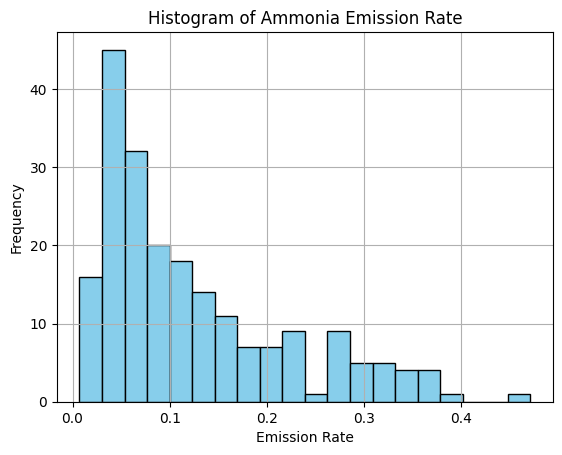

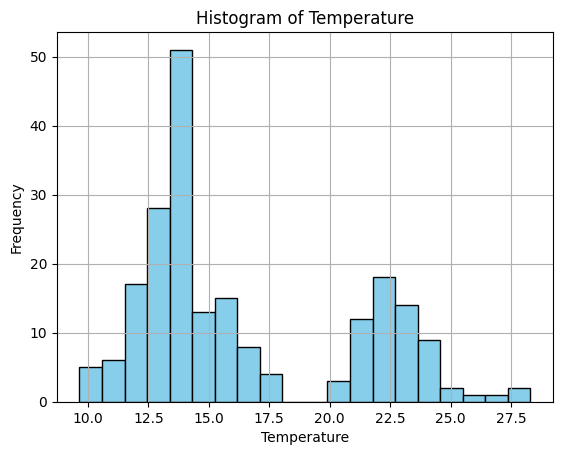

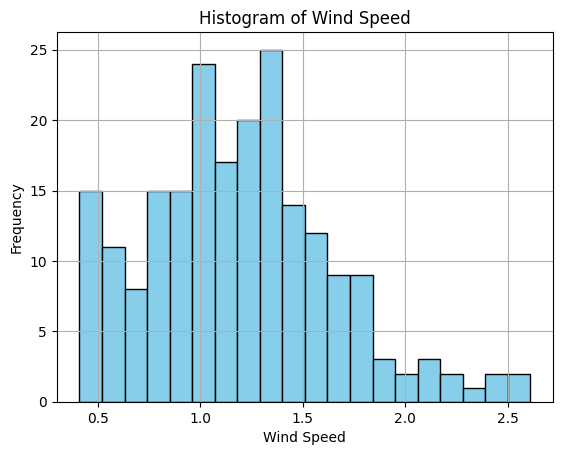

In [19]:
plt.hist(data["Q-NH3"],bins=20,color='skyblue',edgecolor='black')
plt.title('Histogram of Ammonia Emission Rate')
plt.xlabel("Emission Rate")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(data["Temperature (°C)"],bins=20,color='skyblue',edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(data["Wind speed (m/s)"],bins=20,color='skyblue',edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel("Wind Speed")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
clean_data=data[["Temperature (°C)","Wind speed (m/s)","Q-NH3"]].dropna()
emission=clean_data["Q-NH3"]
wind=clean_data["Wind speed (m/s)"]
temp=clean_data["Temperature (°C)"]

pearson_temp, _=pearsonr(temp,emission)
pearson_wind, _=pearsonr(wind,emission)

spearman_temp, _=spearmanr(temp,emission)
spearman_wind, _=spearmanr(wind,emission)

print(f"Temperature and Ammonia Emission Rate Correlations:\nPearson: {pearson_temp:.3f}\nSpearman: {spearman_temp:.3f}")
print(f"\nWind Speed and Ammonia Emission Rate Correlations:\nPearson: {pearson_wind:.3f}\nSpearman: {spearman_wind:.3f}")

Temperature and Ammonia Emission Rate Correlations:
Pearson: 0.732
Spearman: 0.646

Wind Speed and Ammonia Emission Rate Correlations:
Pearson: 0.254
Spearman: 0.371


In [21]:
slope_temp, intercept_temp, r_temp, p_temp, stderr_temp=linregress(temp,emission)
slope_wind, intercept_wind, r_wind, p_wind, stderr_wind=linregress(wind,emission)

print(f"Linear Regression (Temperature):\nSlope: {slope_temp:.3f}\nIntercept: {intercept_temp:.3f}\nR: {r_temp:.3f}")
print(f"\nLinear Regression (Wind Speed):\nSlope: {slope_wind:.3f}\nIntercept: {intercept_wind:.3f}\nR: {r_wind:.3f}")

Linear Regression (Temperature):
Slope: 0.016
Intercept: -0.136
R: 0.732

Linear Regression (Wind Speed):
Slope: 0.054
Intercept: 0.059
R: 0.254


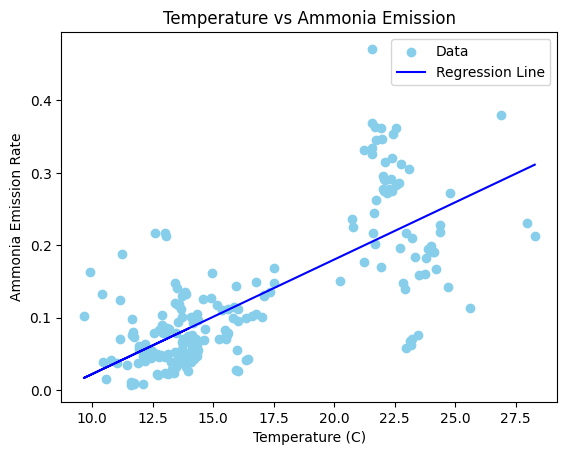

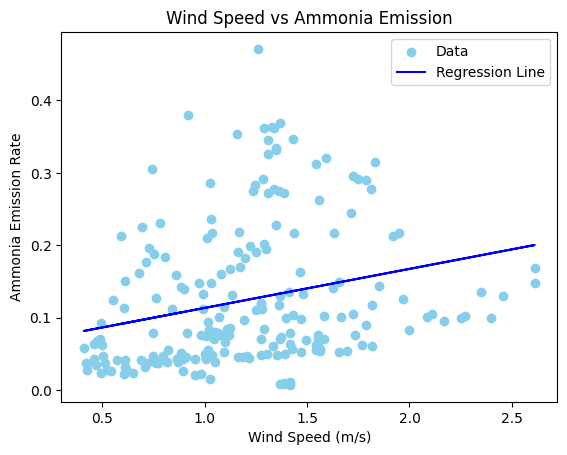

In [22]:
plt.scatter(temp, emission, color='skyblue', label='Data')
plt.plot(temp, slope_temp * temp + intercept_temp, color='blue', label='Regression Line')
plt.title('Temperature vs Ammonia Emission')
plt.xlabel('Temperature (C)')
plt.ylabel('Ammonia Emission Rate')
plt.legend()
plt.show()

plt.scatter(wind, emission, color='skyblue', label='Data')
plt.plot(wind, slope_wind * wind + intercept_wind, color='blue', label='Regression Line')
plt.title('Wind Speed vs Ammonia Emission')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Ammonia Emission Rate')
plt.legend()
plt.show()

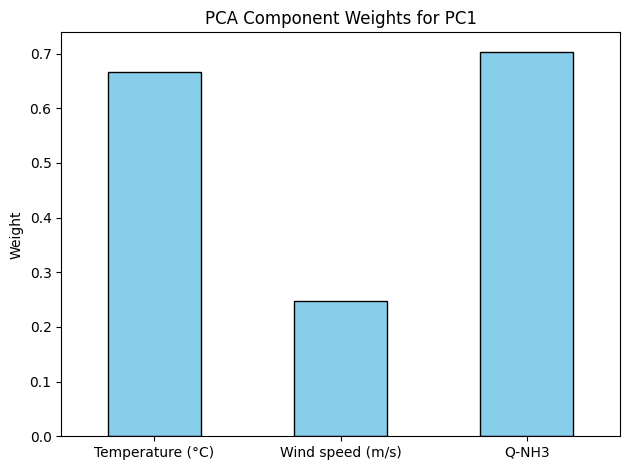

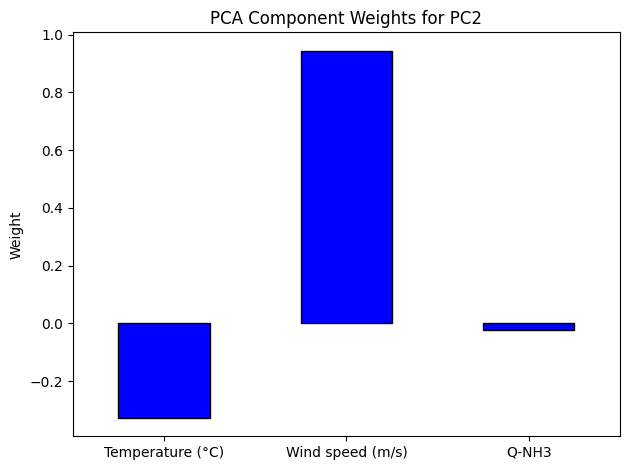

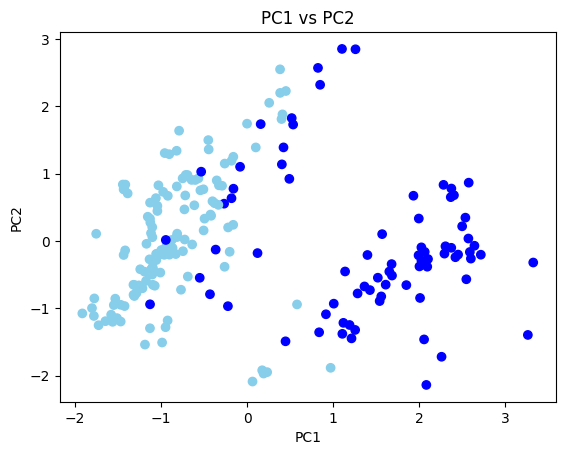

In [40]:
data_scaled=StandardScaler().fit_transform(clean_data)
pca=PCA(n_components=2)
principal_components=pca.fit_transform(data_scaled)
pca_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
colors=['blue' if val >0.124 else 'skyblue' for val in clean_data["Q-NH3"]]
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=clean_data.columns)

loadings['PC1'].plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('PCA Component Weights for PC1')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

loadings['PC2'].plot(kind='bar',color='blue',edgecolor='black')
plt.title('PCA Component Weights for PC2')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.scatter(pca_df['PC1'],pca_df['PC2'], c=colors)
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()